///////////////////////////////////////////////////


In [1]:
import pandas as pd
pandas_df = pd.read_csv("/content/drive/MyDrive/sentiments_data.csv")
pandas_df

,READABLE_DATE,ORGANIZATIONS,AVG_SENTIMENT,NORMALIZED_AVG_SENTIMENT
0,2015-02-20,amazon,1.542990,0.473155
1,2015-02-22,apple,-2.561118,0.020895
2,2015-02-25,amazon,1.611168,0.480668
3,2015-02-25,apple,-2.341667,0.045078
4,2015-03-04,apple,-7.371349,-0.509178
...,...,...,...,...
145,2016-07-05,netflix,2.816901,0.613536
146,2016-07-15,apple,2.452316,0.573360
147,2016-07-24,apple,2.168556,0.542091
148,2016-07-25,apple,-6.087962,-0.367752


[*********************100%***********************]  2 of 2 completed


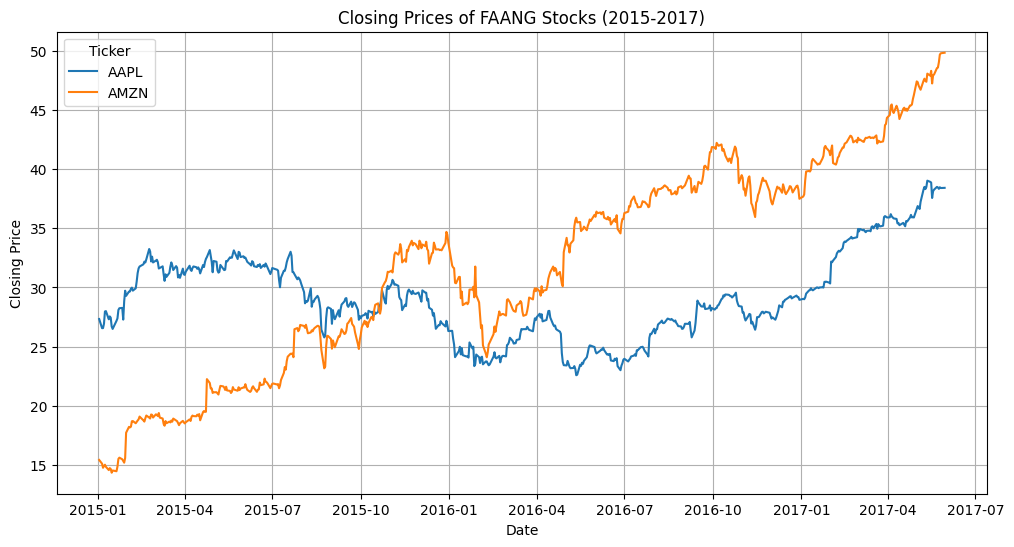

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the tickers (FAANG stocks) and date range
tickers = ['AAPL', 'AMZN']
start_date = '2015-01-01'
end_date = '2017-5-31'

# Download stock data for FAANG stocks
faang_data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')

# Reset the index to make 'Date' a column
faang_data = faang_data.reset_index()

# Print the first few rows to ensure we have the Date column


# Step 1: Plot the closing prices for each FAANG stock
plt.figure(figsize=(12, 6))

# Loop through each ticker and plot its closing price
for ticker in tickers:
    plt.plot(faang_data['Date'], faang_data[(ticker, 'Close')], label=ticker)

# Adding title and labels
plt.title('Closing Prices of FAANG Stocks (2015-2017)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(title='Ticker')
plt.grid(True)

# Show the plot
plt.show()


In [3]:
faang_data

Ticker                      Date       AMZN                                   \
Price                                  Open       High        Low      Close   
0      2015-01-02 00:00:00+00:00  15.629000  15.737500  15.348000  15.426000   
1      2015-01-05 00:00:00+00:00  15.350500  15.419000  15.042500  15.109500   
2      2015-01-06 00:00:00+00:00  15.112000  15.150000  14.619000  14.764500   
3      2015-01-07 00:00:00+00:00  14.875000  15.064000  14.766500  14.921000   
4      2015-01-08 00:00:00+00:00  15.016000  15.157000  14.805500  15.023000   
..                           ...        ...        ...        ...        ...   
601    2017-05-23 00:00:00+00:00  48.750999  48.759998  48.342499  48.577000   
602    2017-05-24 00:00:00+00:00  48.799999  49.049999  48.511501  49.017502   
603    2017-05-25 00:00:00+00:00  49.242500  49.950001  49.105499  49.668999   
604    2017-05-26 00:00:00+00:00  49.750000  49.932499  49.462502  49.789001   
605    2017-05-30 00:00:00+00:00  49.825500  50.060001  49.776001  49.834999   

Ticker                            AAPL                                   \
Price   Adj Close    Volume       Open       High        Low      Close   
0       15.426000  55664000  27.847500  27.860001  26.837500  27.332500   
1       15.109500  55484000  27.072500  27.162500  26.352501  26.562500   
2       14.764500  70380000  26.635000  26.857500  26.157499  26.565001   
3       14.921000  52806000  26.799999  27.049999  26.674999  26.937500   
4       15.023000  61768000  27.307501  28.037500  27.174999  27.972500   
..            ...       ...        ...        ...        ...        ...   
601     48.577000  48312000  38.724998  38.724998  38.327499  38.450001   
602     49.017502  48920000  38.459999  38.542500  38.167500  38.334999   
603     49.668999  96440000  38.432499  38.587502  38.257500  38.467499   
604     49.789001  69384000  38.500000  38.560001  38.327499  38.402500   
605     49.834999  65262000  38.355000  38.607498  38.332500  38.417500   

Ticker                        
Price   Adj Close     Volume  
0       24.373960  212818400  
1       23.687305  257142000  
2       23.689535  263188400  
3       24.021715  160423600  
4       24.944679  237458000  
..            ...        ...  
601     35.950493   79675600  
602     35.842979   76712000  
603     35.966854   76942400  
604     35.906082   87710400  
605     35.920116   80507600  

[606 rows x 13 columns]

In [4]:
# Flatten the columns in faang_data by joining multi-level columns with an underscore
faang_data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in faang_data.columns]


In [6]:
sentiment_data =pandas_df
# Convert the READABLE_DATE column in sentiment_data to datetime format
sentiment_data['READABLE_DATE'] = pd.to_datetime(sentiment_data['READABLE_DATE'])

# Ensure the Date_ column in faang_data is also in datetime format
faang_data['Date_'] = pd.to_datetime(faang_data['Date_'])


In [7]:
# Remove the timezone from the Date_ column in faang_data
faang_data['Date_'] = faang_data['Date_'].dt.tz_localize(None)


In [8]:
# Merge the data based on the date columns
merged_data = pd.merge(faang_data, sentiment_data, left_on='Date_', right_on='READABLE_DATE', how='inner')


In [9]:
# Inspect the first few rows of the merged data
print(merged_data.head())


       Date_  AMZN_Open  AMZN_High   AMZN_Low  AMZN_Close  AMZN_Adj Close  \
0 2015-02-20  18.931000  19.184999  18.792000   19.183001       19.183001   
1 2015-02-25  18.863501  19.392500  18.827000   19.268499       19.268499   
2 2015-02-25  18.863501  19.392500  18.827000   19.268499       19.268499   
3 2015-03-04  19.285500  19.395000  19.109501   19.136000       19.136000   
4 2015-03-09  18.920000  18.966499  18.764000   18.927999       18.927999   

   AMZN_Volume  AAPL_Open  AAPL_High   AAPL_Low  AAPL_Close  AAPL_Adj Close  \
0     65160000  32.154999  32.375000  32.012501   32.375000       28.984583   
1     63490000  32.889999  32.900002  32.037498   32.197498       28.825674   
2     63490000  32.889999  32.900002  32.037498   32.197498       28.825674   
3     45182000  32.275002  32.389999  32.080002   32.134998       28.769722   
4     46228000  31.990000  32.392502  31.264999   31.785000       28.456369   

   AAPL_Volume READABLE_DATE ORGANIZATIONS  AVG_SENTIMENT  \
0

# Plot closing prices and sentiment over time


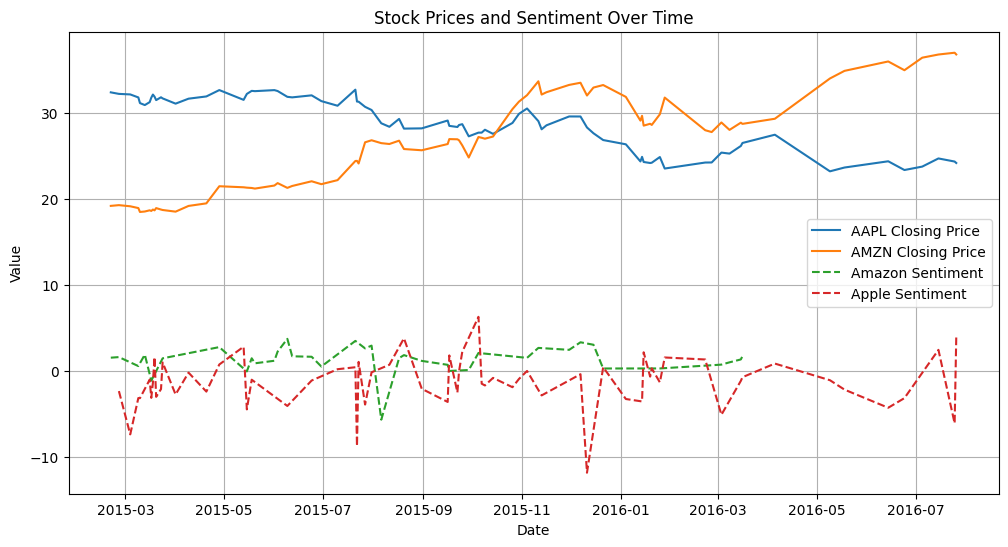

In [11]:
import matplotlib.pyplot as plt

# Filter data for each organization (if needed)
amazon_data = merged_data[merged_data['ORGANIZATIONS'] == 'amazon']
apple_data = merged_data[merged_data['ORGANIZATIONS'] == 'apple']

# Create the plot
plt.figure(figsize=(12, 6))

# Plot closing prices for AAPL and AMZN
plt.plot(merged_data['Date_'], merged_data['AAPL_Close'], label='AAPL Closing Price')
plt.plot(merged_data['Date_'], merged_data['AMZN_Close'], label='AMZN Closing Price')

# Plot sentiment for Amazon and Apple separately
plt.plot(amazon_data['Date_'], amazon_data['AVG_SENTIMENT'], label='Amazon Sentiment', linestyle='--')
plt.plot(apple_data['Date_'], apple_data['AVG_SENTIMENT'], label='Apple Sentiment', linestyle='--')

# Add title and labels
plt.title('Stock Prices and Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


**Relationship Between Sentiment and Stock Price:**
*Amazon*:
The sentiment data for Amazon remains mostly positive, which may correspond with the upward trend of AMZN’s stock price.
There are some periods where negative sentiment occurs (e.g., mid-2015 and early 2016), but these don’t seem to correlate directly with major drops in the stock price. This suggests that AMZN’s stock price might not be highly sensitive to short-term negative sentiment or that other factors are driving the price up.
*Apple*:
Apple’s sentiment is highly volatile, and there seems to be a slight correlation between negative sentiment spikes and stock price drops. For example, around September 2015, both the sentiment and the stock price experience a downturn.
The overall downward trend in Apple's stock price in early 2016 could reflect a combination of factors, including volatile sentiment and other macroeconomic or company-specific issues

In [17]:
merged_data = merged_data.drop_duplicates(subset='Date_', keep='first')


# Group by Date_ and calculate mean for sentiment scores


In [12]:
# Group by Date_ and calculate mean for sentiment scores
merged_data = merged_data.groupby('Date_').agg({
    'AMZN_Open': 'first',
    'AMZN_Close': 'first',
    'AAPL_Open': 'first',
    'AAPL_Close': 'first',
    'AVG_SENTIMENT': 'mean',
    'NORMALIZED_AVG_SENTIMENT': 'mean',
    # add other relevant columns as necessary
}).reset_index()


In [13]:
# Daily returns for AMZN and AAPL
merged_data['AMZN_Return'] = merged_data['AMZN_Close'].pct_change()
merged_data['AAPL_Return'] = merged_data['AAPL_Close'].pct_change()


In [14]:
# 5-day rolling mean for sentiment scores
merged_data['Sentiment_Rolling_Mean'] = merged_data['AVG_SENTIMENT'].rolling(window=5).mean()


In [15]:
# 1 for price up, 0 for price down for AMZN and AAPL
merged_data['AMZN_Direction'] = (merged_data['AMZN_Close'].shift(-1) > merged_data['AMZN_Close']).astype(int)
merged_data['AAPL_Direction'] = (merged_data['AAPL_Close'].shift(-1) > merged_data['AAPL_Close']).astype(int)


In [16]:
from sklearn.model_selection import train_test_split

# Define the features and target for prediction (example for AMZN)
features = ['AMZN_Return', 'AAPL_Return', 'Sentiment_Rolling_Mean']
target = 'AMZN_Direction'

X = merged_data[features].dropna()
y = merged_data[target].dropna()

# Train/test split


# Combine X and y into a single DataFrame to ensure no rows are dropped inconsistently


In [17]:
# Combine X and y into a single DataFrame to ensure no rows are dropped inconsistently
merged_xy = pd.concat([X, y], axis=1).dropna()

# Separate X and y after removing NaN values
X_clean = merged_xy[features]
y_clean = merged_xy[target]


In [18]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)


In [19]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [20]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)


# Calculate the accuracy of the model


In [21]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")

# Print a detailed classification report
print(classification_report(y_test, y_pred))


Model accuracy: 50.00%
              precision    recall  f1-score   support

           0       0.25      0.17      0.20         6
           1       0.58      0.70      0.64        10

    accuracy                           0.50        16
   macro avg       0.42      0.43      0.42        16
weighted avg       0.46      0.50      0.47        16



In [22]:
# Get feature importance from the Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importance
importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print feature importances
print(importances_df)


                  Feature  Importance
0             AMZN_Return    0.342609
1             AAPL_Return    0.335701
2  Sentiment_Rolling_Mean    0.321690


# Initialize GridSearchCV with Random Forest


In [23]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with Random Forest
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Best parameters
print(grid_search.best_params_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [24]:
# Add a 1-day lagged return feature for AMZN
merged_data['AMZN_Lag1'] = merged_data['AMZN_Return'].shift(1)


# Initialize the XGBoost classifier


In [25]:
import xgboost as xgb

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Model accuracy: {accuracy_xgb * 100:.2f}%")


XGBoost Model accuracy: 62.50%


In [26]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)

# Print the mean cross-validation accuracy
print(f"Mean cross-validation accuracy: {cv_scores.mean() * 100:.2f}%")


Mean cross-validation accuracy: 38.97%


In [27]:
pip install tensorflow


In [43]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Define the sequence length (timesteps)
sequence_length = 10  # This means the LSTM will look at the last 10 days to predict the next day

# Select features for LSTM
lstm_features = ['AMZN_Return', 'Sentiment_Rolling_Mean']
target = 'AMZN_Direction'  # We will predict AMZN stock direction

# Drop NaN values to avoid issues
merged_data_clean = merged_data[lstm_features + [target]].dropna()

# Scale the data for better LSTM performance
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(merged_data_clean[lstm_features])

# Prepare the LSTM input (X) and output (y)
def create_sequences(data, labels, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(labels[i+sequence_length])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, merged_data_clean[target].values, sequence_length)


In [44]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()

# Add an LSTM layer with 50 units and return sequences to stack more layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Add another LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Add a Dense layer for binary classification
model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 10, 50)              │          10,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,851 (120.51 KB)

 Trainable params: 30,851 (120.51 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 489ms/step - accuracy: 0.5494 - loss: 0.6894 - val_accuracy: 0.5714 - val_loss: 0.6827
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6015 - loss: 0.6873 - val_accuracy: 0.5714 - val_loss: 0.6786
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5579 - loss: 0.6828 - val_accuracy: 0.5714 - val_loss: 0.6765
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5266 - loss: 0.6909 - val_accuracy: 0.5714 - val_loss: 0.6754
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5683 - loss: 0.6819 - val_accuracy: 0.5714 - val_loss: 0.6744
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5579 - loss: 0.6884 - val_accuracy: 0.5714 - val_loss: 0.6740
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5683 - loss: 0.6826 - val_accuracy: 0.5714 - val_loss: 0.6737
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5683 - loss: 0.6855 - val_accuracy: 0.5714 - val_loss: 0.6737

In [47]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5714 - loss: 0.6740
Test Accuracy: 57.14%


In [48]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert predictions to binary labels (0 or 1)
y_pred = (y_pred > 0.5).astype(int)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.57      1.00      0.73         8

    accuracy                           0.57        14
   macro avg       0.29      0.50      0.36        14
weighted avg       0.33      0.57      0.42        14



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


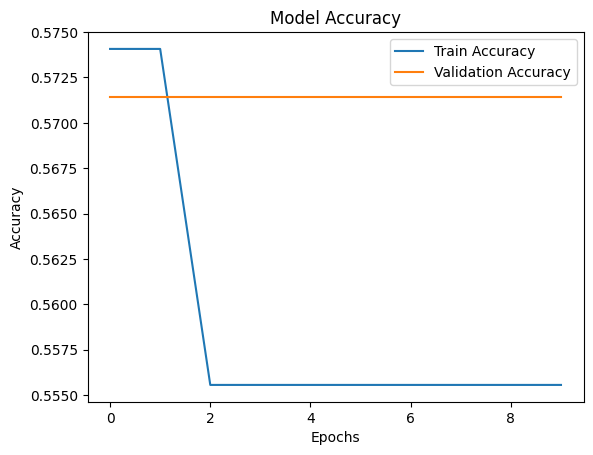

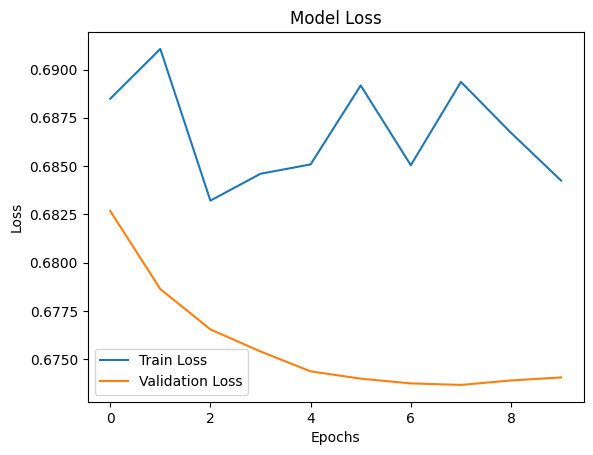

In [49]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [50]:
# Reduce LSTM layers and units
model = Sequential()

# A single LSTM layer with fewer units
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))  # Keep dropout to prevent overfitting

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
# Increase dropout rate to 0.4
model.add(Dropout(0.4))  # Apply more dropout after the LSTM layer


In [52]:
from tensorflow.keras.callbacks import EarlyStopping

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 331ms/step - accuracy: 0.5475 - loss: 4.4021 - val_accuracy: 0.5714 - val_loss: 0.6876
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4772 - loss: 4.6564 - val_accuracy: 0.4286 - val_loss: 0.6943
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5000 - loss: 4.1364 - val_accuracy: 0.4286 - val_loss: 0.7024
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4772 - loss: 4.5874 - val_accuracy: 0.4286 - val_loss: 0.7117
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4564 - loss: 4.1087 - val_accuracy: 0.4286 - val_loss: 0.7225
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5826 - loss: 3.3992 - val_accuracy: 0.4286 - val_loss: 0.7337


In [53]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)

# Example of cross-validation
for train_index, test_index in kf.split(X):
    X_train_cv, X_test_cv = X[train_index], X[test_index]
    y_train_cv, y_test_cv = y[train_index], y[test_index]

    # Train the model on the current fold
    model.fit(X_train_cv, y_train_cv, epochs=10, batch_size=32, validation_data=(X_test_cv, y_test_cv))


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.5019 - loss: 4.8076 - val_accuracy: 0.5714 - val_loss: 0.6915
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6404 - loss: 2.8850 - val_accuracy: 0.4286 - val_loss: 0.6970
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5208 - loss: 4.0404 - val_accuracy: 0.4286 - val_loss: 0.7037
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6015 - loss: 4.3911 - val_accuracy: 0.4286 - val_loss: 0.7113
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5598 - loss: 4.4530 - val_accuracy: 0.4286 - val_loss: 0.7200
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.3927 - loss: 6.0290 - val_accuracy: 0.4286 - val_loss: 0.7303
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4915 - loss: 5.0225 - val_accuracy: 0.4286 - val_loss: 0.7422
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6385 - loss: 3.1792 - val_accuracy: 0.4286 - val_loss: 0.7532


In [54]:
# Sliding window approach
def create_sequences(data, labels, sequence_length, stride=1):
    X, y = [], []
    for i in range(0, len(data) - sequence_length, stride):
        X.append(data[i:i+sequence_length])
        y.append(labels[i+sequence_length])
    return np.array(X), np.array(y)

# Example with stride of 1 (overlapping windows)
X, y = create_sequences(scaled_data, merged_data_clean[target].values, sequence_length=10, stride=1)


In [55]:
# Reduce the number of epochs
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.5247 - loss: 3.6156 - val_accuracy: 0.4286 - val_loss: 0.7929
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4525 - loss: 4.9074 - val_accuracy: 0.4286 - val_loss: 0.7940
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6651 - loss: 3.1323 - val_accuracy: 0.4286 - val_loss: 0.7923
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4545 - loss: 4.2317 - val_accuracy: 0.4286 - val_loss: 0.7906
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5228 - loss: 3.7910 - val_accuracy: 0.4286 - val_loss: 0.7898


In [56]:
# If you only have one timestep (or single feature), reshape the data to be 3D
X_train = np.expand_dims(X_train, axis=1)  # Add a timestep dimension
X_test = np.expand_dims(X_test, axis=1)


In [59]:
print(X_train.shape)


(54, 1, 10, 2)


In [60]:
from tensorflow.keras.regularizers import l2
import numpy as np

# Assuming X_train and X_test are currently 2D, we reshape them to 3D
# Assuming X_train and X_test are 2D, we add a single timestep dimension to make them 3D
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[2], X_train.shape[3]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[2], X_test.shape[3]))

print(X_train.shape)  # Check the shape after reshaping

# Now define the LSTM model with L2 regularization
model = Sequential()

# Add LSTM layer with L2 regularization
model.add(LSTM(units=50, kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))

# Output layer for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
# Train the model again after reshaping the data correctly
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


(54, 10, 2)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 50)                  │          10,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,651 (41.61 KB)

 Trainable params: 10,651 (41.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 768ms/step - accuracy: 0.5266 - loss: 0.7345 - val_accuracy: 0.5714 - val_loss: 0.7206
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5436 - loss: 0.7322 - val_accuracy: 0.5714 - val_loss: 0.7176
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.5266 - loss: 0.7327 - val_accuracy: 0.5714 - val_loss: 0.7158
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.5351 - loss: 0.7208 - val_accuracy: 0.5714 - val_loss: 0.7139
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.5579 - loss: 0.7239 - val_accuracy: 0.5714 - val_loss: 0.7122
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.5683 - loss: 0.7188 - val_accuracy: 0.5714 - val_loss: 0.7107
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.6015 - loss: 0.7048 - val_accuracy: 0.5714 - val_loss: 0.7094
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.5806 - loss: 0.7193 - val_accuracy: 0.5714 - val_loss: 

In [ ]:
print(X_train.shape)  # Check the shape before reshaping


In [61]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5714 - loss: 0.7065
Test Accuracy: 57.14%


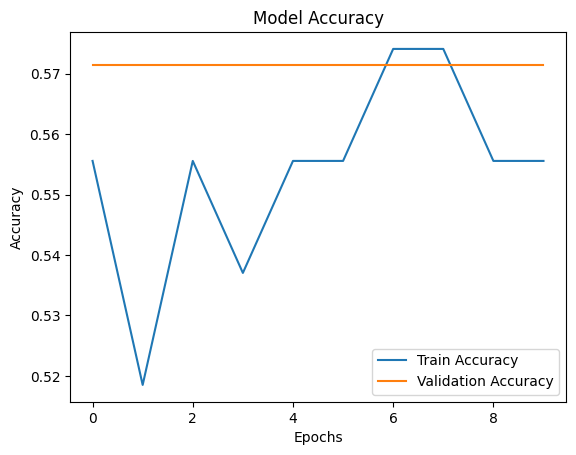

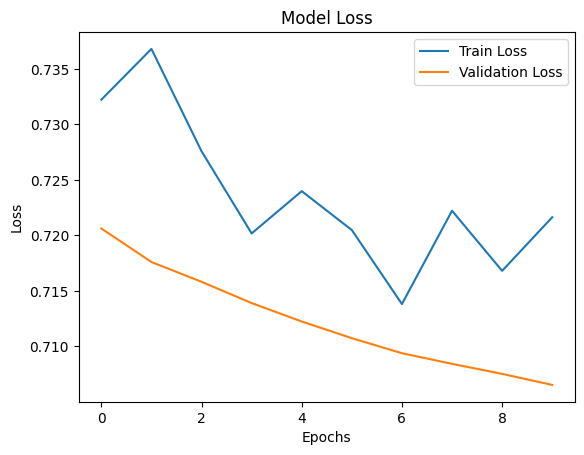

In [62]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Interpretation**:
The model is not generalizing well to the validation set. The fact that the validation accuracy remains flat while the training accuracy fluctuates could be a sign of overfitting or that the model isn't learning useful patterns from the data.
The fluctuations in training accuracy without corresponding changes in validation accuracy suggest that the model is sensitive to small variations in the training data, but these changes don’t translate into better generalization.

**Interpretation**:
The decreasing validation loss is a positive sign—it shows that the model is minimizing error when predicting on the validation set. However, because the validation accuracy remains flat, it suggests that the model’s improvements in minimizing loss are not translating into better classification performance (i.e., the model is getting more "confident" but not necessarily more "correct").
The divergence between the training and validation loss/accuracy suggests that the model might not be learning meaningful relationships from the data. Instead, it might be learning noise, resulting in an unstable training accuracy and a flat validation accuracy.

In [63]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Convert the predictions to binary labels (0 or 1)
y_pred = (y_pred > 0.5).astype(int)

# Print the first few predictions
print(y_pred[:5])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
[[1]
 [1]
 [1]
 [1]
 [1]]


In [64]:
from sklearn.metrics import classification_report

# Evaluate the predicted labels against the true labels
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.57      1.00      0.73         8

    accuracy                           0.57        14
   macro avg       0.29      0.50      0.36        14
weighted avg       0.33      0.57      0.42        14



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
